# King County House Sales Regression Analysis
## Data Modeling

* Student name: Spencer Hadel
* Student pace: Flex
* Scheduled project review date/time: 6/5/2022, 11:00am EST
* Instructor name: Claude Fried

### Import Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, ShuffleSplit

from sklearn.metrics import mean_squared_error

### Import Prepared Data from kc_preprocessing_exploring.ipynb

We have already preprocessed our data in the kc_kc_preprocessing_exploring notebook:

[Preprocessing Notebook](./kc_preprocessing_exploring.ipynb)

In [2]:
df = pd.read_csv('./data/preprocessed.csv', index_col = 0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 68 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                21534 non-null  float64
 1   sqft_living          21534 non-null  float64
 2   sqft_lot             21534 non-null  float64
 3   yr_built             21534 non-null  float64
 4   bedrooms_10          21534 non-null  int64  
 5   bedrooms_11          21534 non-null  int64  
 6   bedrooms_2           21534 non-null  int64  
 7   bedrooms_3           21534 non-null  int64  
 8   bedrooms_33          21534 non-null  int64  
 9   bedrooms_4           21534 non-null  int64  
 10  bedrooms_5           21534 non-null  int64  
 11  bedrooms_6           21534 non-null  int64  
 12  bedrooms_7           21534 non-null  int64  
 13  bedrooms_8           21534 non-null  int64  
 14  bedrooms_9           21534 non-null  int64  
 15  bathrooms_0.75       21534 non-null 

In [4]:
subs = [(' ', '_'),('.','_'),("'",""),('™', ''), ('®',''),
        ('+','plus'), ('½','half'), ('-','_')
       ]
def col_formatting(col):
    for old, new in subs:
        col = col.replace(old,new)
    return col

df.columns = [col_formatting(col) for col in df.columns]

list(df.columns)

['price',
 'sqft_living',
 'sqft_lot',
 'yr_built',
 'bedrooms_10',
 'bedrooms_11',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_33',
 'bedrooms_4',
 'bedrooms_5',
 'bedrooms_6',
 'bedrooms_7',
 'bedrooms_8',
 'bedrooms_9',
 'bathrooms_0_75',
 'bathrooms_1_0',
 'bathrooms_1_25',
 'bathrooms_1_5',
 'bathrooms_1_75',
 'bathrooms_2_0',
 'bathrooms_2_25',
 'bathrooms_2_5',
 'bathrooms_2_75',
 'bathrooms_3_0',
 'bathrooms_3_25',
 'bathrooms_3_5',
 'bathrooms_3_75',
 'bathrooms_4_0',
 'bathrooms_4_25',
 'bathrooms_4_5',
 'bathrooms_4_75',
 'bathrooms_5_0',
 'bathrooms_5_25',
 'bathrooms_5_5',
 'bathrooms_5_75',
 'bathrooms_6_0',
 'bathrooms_6_25',
 'bathrooms_6_5',
 'bathrooms_6_75',
 'bathrooms_7_5',
 'bathrooms_7_75',
 'bathrooms_8_0',
 'floors_1_5',
 'floors_2_0',
 'floors_2_5',
 'floors_3_0',
 'floors_3_5',
 'renovated_2000_1',
 'grade_11_Excellent',
 'grade_12_Luxury',
 'grade_13_Mansion',
 'grade_3_Poor',
 'grade_4_Low',
 'grade_5_Fair',
 'grade_6_Low_Average',
 'grade_7_Average',
 'grade_

## Split, Train and Test Data

Now that we have a complete preprocessed dataset, we need to split the data into train and test datasets, as well as identify the feature we are testing for: price.

In [5]:
predictors = df.drop('price', axis=1)
target = df['price']

X_train, X_test, y_train, y_test = train_test_split(predictors, target)

#check size of each
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16150, 67), (5384, 67), (16150,), (5384,))

In [6]:
X_1 = X_train
y = y_train

model_1 = sm.OLS(y, sm.add_constant(X_1)).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     479.4
Date:                Wed, 04 May 2022   Prob (F-statistic):               0.00
Time:                        01:07:41   Log-Likelihood:                -14258.
No. Observations:               16150   AIC:                         2.865e+04
Df Residuals:                   16084   BIC:                         2.916e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.6660      0.343      1.943      0.052      -0.006       1.338
sqft_living             0.3720      0.010     35.783      0.000       0.352       0.392
sqft_lot               -0.0671      0.006    -11.885      0.000      -0.078      -0.056
yr_built               -0.2928      0.007    -40.651      0.000      -0.307      -0.279
bedrooms_10            -0.1871      0.419     -0.447      0.655      -1.008       0.634
bedrooms_11            -0.7665      0.590     -1.300      0.194      -1.922       0.389
bedrooms_2             -0.0316      0.053     -0.596      0.551      -0.136       0.072
bedrooms_3             -0.2411      0.053     -4.524      0.000      -0.346      -0.137
bedrooms_33         -4.151e-15   3.05e-15     -1.360      0.174   -1.01e-14    1.83e-15
bedrooms_4             -0.3051      0.055     -5.582      0.000      -0.412      -0.198
bedrooms_5             -0.3090      0.057     -5.379      0.000      -0.422      -0.196
bedrooms_6             -0.4087      0.069     -5.896      0.000      -0.545      -0.273
bedrooms_7             -0.5362      0.136     -3.953      0.000      -0.802      -0.270
bedrooms_8             -0.2216      0.232     -0.954      0.340      -0.677       0.234
bedrooms_9             -0.3841      0.302     -1.270      0.204      -0.977       0.209
bathrooms_0_75          0.5504      0.348      1.581      0.114      -0.132       1.233
bathrooms_1_0           0.5248      0.339      1.547      0.122      -0.140       1.190
bathrooms_1_25          0.4951      0.449      1.103      0.270      -0.384       1.375
bathrooms_1_5           0.5139      0.340      1.512      0.131      -0.152       1.180
bathrooms_1_75          0.6239      0.340      1.836      0.066      -0.042       1.290
bathrooms_2_0           0.6278      0.340      1.847      0.065      -0.038       1.294
bathrooms_2_25          0.6671      0.340      1.961      0.050       0.000       1.334
bathrooms_2_5           0.6543      0.340      1.924      0.054      -0.012       1.321
bathrooms_2_75          0.7330      0.341      2.152      0.031       0.065       1.401
bathrooms_3_0           0.7508      0.341      2.202      0.028       0.083       1.419
bathrooms_3_25          0.8802      0.341      2.578      0.010       0.211       1.549
bathrooms_3_5           0.8868      0.341      2.598      0.009       0.218       1.556
bathrooms_3_75          1.0333      0.345      2.997      0.003       0.357       1.709
bathrooms_4_0           0.9757      0.346      2.823      0.005       0.298       1.653
bathrooms_4_25          1.1279      0.350      3.225      0.001       0.442       1.813
bathrooms_4_5           0.9817      0.348      2.822      0.005       0.300       1.664
bathrooms_4_75          1.3017      0.367      3.548      0.000       0.582       2.021
bat

Next we train our model on the test data.

In [7]:
orig_model = LinearRegression()

# Fit the model on X_train_final and y_train
orig_model.fit(X_train, y_train)

orig_model.score(X_test, y_test)

0.6581719602496805

### Remove Uninfluential Features

The first issue with our model is the number of features. This much potential noise is likely not helping our model properly train itself on the relevant data.

In order to reduce the number of features, we will first use scikit-learn's feature_selection submodule to select only the most important features.

In [8]:
# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_1)

# Instantiate and fit the selector
selector = RFECV(LinearRegression(), cv=ShuffleSplit(n_splits=3, test_size=0.25, random_state=0))
selector.fit(X_train_for_RFECV, y_train)

selected_features = []

# Relevant Features:
for index, col in enumerate(X_1.columns):
    if selector.support_[index] == True:
        selected_features.append(col)
        #print(col)

print(selected_features)

['sqft_living', 'sqft_lot', 'yr_built', 'bedrooms_3', 'bedrooms_33', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'bathrooms_3_25', 'bathrooms_3_5', 'bathrooms_3_75', 'bathrooms_4_25', 'floors_3_0', 'grade_11_Excellent', 'grade_12_Luxury', 'grade_13_Mansion', 'grade_4_Low', 'grade_5_Fair', 'grade_6_Low_Average', 'grade_7_Average', 'grade_8_Good', 'grade_9_Better', 'condition_Very_Good', 'view_EXCELLENT', 'view_NONE', 'waterfront_YES']


Now we rerun the model with only the feature_selector's most important features.

In [9]:
X_2 = X_train[selected_features]

model_2 = sm.OLS(y, sm.add_constant(X_2)).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     1217.
Date:                Wed, 04 May 2022   Prob (F-statistic):               0.00
Time:                        01:07:50   Log-Likelihood:                -14399.
No. Observations:               16150   AIC:                         2.885e+04
Df Residuals:                   16124   BIC:                         2.905e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.3424      0.030     45.050      0.000       1.284       1.401
sqft_living             0.4232      0.009     46.941      0.000       0.405       0.441
sqft_lot               -0.0815      0.005    -15.313      0.000      -0.092      -0.071
yr_built               -0.2843      0.006    -49.980      0.000      -0.295      -0.273
bedrooms_3             -0.1870      0.016    -11.845      0.000      -0.218      -0.156
bedrooms_33         -3.215e-15   4.97e-16     -6.473      0.000   -4.19e-15   -2.24e-15
bedrooms_4             -0.2413      0.019    -12.856      0.000      -0.278      -0.204
bedrooms_5             -0.2224      0.025     -8.815      0.000      -0.272      -0.173
bedrooms_6             -0.2783      0.046     -6.081      0.000      -0.368      -0.189
bathrooms_3_25          0.1780      0.030      5.990      0.000       0.120       0.236
bathrooms_3_5           0.1648      0.027      6.003      0.000       0.111       0.219
bathrooms_3_75          0.2974      0.056      5.276      0.000       0.187       0.408
bathrooms_4_25          0.3544      0.080      4.415      0.000       0.197       0.512
floors_3_0              0.3045      0.030     10.139      0.000       0.246       0.363
grade_11_Excellent      0.3709      0.041      9.139      0.000       0.291       0.450
grade_12_Luxury         0.7966      0.072     11.115      0.000       0.656       0.937
grade_13_Mansion        1.3919      0.180      7.727      0.000       1.039       1.745
grade_4_Low            -1.9767      0.140    -14.079      0.000      -2.252      -1.701
grade_5_Fair           -2.0740      0.054    -38.613      0.000      -2.179      -1.969
grade_6_Low_Average    -1.7657      0.033    -53.430      0.000      -1.831      -1.701
grade_7_Average        -1.3001      0.026    -49.436      0.000      -1.352      -1.249
grade_8_Good           -0.8518      0.024    -34.954      0.000      -0.900      -0.804
grade_9_Better         -0.3639      0.025    -14.588      0.000      -0.413      -0.315
condition_Very_Good     0.1639      0.018      9.211      0.000       0.129       0.199
view_EXCELLENT          0.2251      0.049      4.597      0.000       0.129       0.321
view_NONE              -0.2232      0.018    -12.573      0.000      -0.258      -0.188
waterfront_YES          0.6573      0.068      9.617      0.000       0.523       0.791
==============================================================================
Omnibus:                       60.324   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.986
Skew:                          -0.098   Prob(JB):                     1.05e-15
Kurtosis:                       3.253   Cond. No.                     1.33e+16
================================================

This yielded approximately the same R squared score, which is good because it means the features we removed were in fact very inconsequential to the outcome of our model. It also removed any feature with a value above the threshold of 0.05, removing our need to do this manually.

### Investigate Multicollinearity

The Cond. No is 74.6, and since this is above 30 (which indicates strong multicollinearity) the next step is to check our features for multicollinearity, and remove any features that may be impacting each other in a way that trains our model incorrectly.

We can start by investigating multicollinearity the same way as the preprocessing step.

In [10]:
corr = X_2.corr()
corr > 0.8

,sqft_living,sqft_lot,yr_built,bedrooms_3,bedrooms_33,bedrooms_4,bedrooms_5,bedrooms_6,bathrooms_3_25,bathrooms_3_5,...,grade_4_Low,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better,condition_Very_Good,view_EXCELLENT,view_NONE,waterfront_YES
sqft_living,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
yr_built,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms_3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms_33,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms_4,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms_5,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms_6,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms_3_25,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms_3_5,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


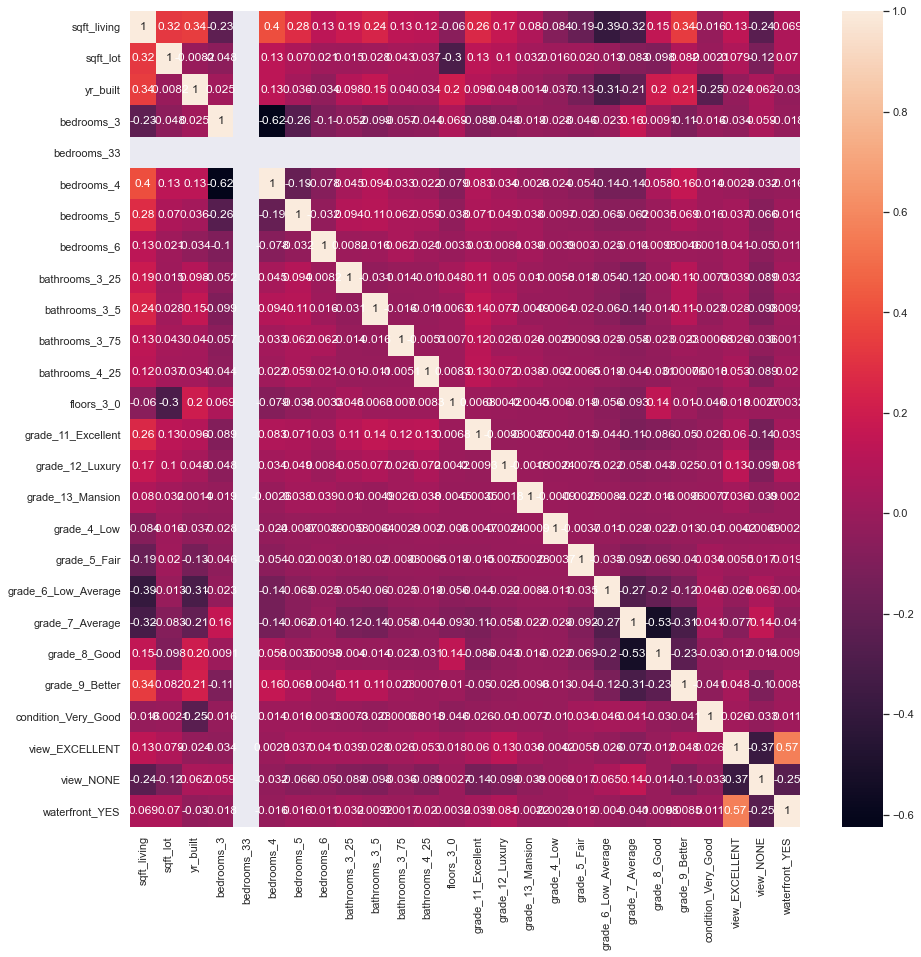

In [11]:
sns.set(rc = {'figure.figsize':(15,15)})
sns.heatmap(corr, annot = True);

There are still a lot of features, making this hard to look at and understand at a galnce. So we will use statsmodels' variance_inflation_factor to look at this information more clearly.

In [12]:
vif = [variance_inflation_factor(X_2.values, i) for i in range(X_2.shape[1])]
vif_scores = list(zip(X_2, vif))
vif_scores

C:\Users\shade\anaconda3\envs\learn-env\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


[('sqft_living', 3.6860020685128423),
 ('sqft_lot', 1.30227415640362),
 ('yr_built', 1.4998043180405711),
 ('bedrooms_3', 4.622460958773089),
 ('bedrooms_33', nan),
 ('bedrooms_4', 4.693071682645992),
 ('bedrooms_5', 2.090001065215031),
 ('bedrooms_6', 1.2146523758929388),
 ('bathrooms_3_25', 1.099346108084355),
 ('bathrooms_3_5', 1.1491681304131163),
 ('bathrooms_3_75', 1.0495239971240249),
 ('bathrooms_4_25', 1.0434612422843934),
 ('floors_3_0', 1.2126650512768908),
 ('grade_11_Excellent', 1.2287908790484188),
 ('grade_12_Luxury', 1.085699145867162),
 ('grade_13_Mansion', 1.0176422487626335),
 ('grade_4_Low', 1.0391444450901786),
 ('grade_5_Fair', 1.3247115902135278),
 ('grade_6_Low_Average', 3.056608972702157),
 ('grade_7_Average', 7.554790626304856),
 ('grade_8_Good', 4.35742636960312),
 ('grade_9_Better', 2.1785652487556226),
 ('condition_Very_Good', 1.1691766005502702),
 ('view_EXCELLENT', 1.603030496717074),
 ('view_NONE', 10.09132003966708),
 ('waterfront_YES', 1.49690923281211

In [13]:
new_features = [x for x,vif in vif_scores if vif < 5]
new_features

['sqft_living',
 'sqft_lot',
 'yr_built',
 'bedrooms_3',
 'bedrooms_4',
 'bedrooms_5',
 'bedrooms_6',
 'bathrooms_3_25',
 'bathrooms_3_5',
 'bathrooms_3_75',
 'bathrooms_4_25',
 'floors_3_0',
 'grade_11_Excellent',
 'grade_12_Luxury',
 'grade_13_Mansion',
 'grade_4_Low',
 'grade_5_Fair',
 'grade_6_Low_Average',
 'grade_8_Good',
 'grade_9_Better',
 'condition_Very_Good',
 'view_EXCELLENT',
 'waterfront_YES']

Now that we have checked for uninfluential features as well as features potentially causing multicollinearity, we run the tests again.

In [14]:
X_3 = X_train[new_features]

model_3 = sm.OLS(y, sm.add_constant(X_3)).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     1033.
Date:                Wed, 04 May 2022   Prob (F-statistic):               0.00
Time:                        01:07:59   Log-Likelihood:                -15648.
No. Observations:               16150   AIC:                         3.134e+04
Df Residuals:                   16126   BIC:                         3.153e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1263      0.017      7.262      0.000       0.092       0.160
sqft_living             0.6288      0.009     71.874      0.000       0.612       0.646
sqft_lot               -0.0687      0.006    -11.959      0.000      -0.080      -0.057
yr_built               -0.2541      0.006    -42.380      0.000      -0.266      -0.242
bedrooms_3             -0.3004      0.017    -17.778      0.000      -0.333      -0.267
bedrooms_4             -0.3860      0.020    -19.261      0.000      -0.425      -0.347
bedrooms_5             -0.4297      0.027    -15.968      0.000      -0.482      -0.377
bedrooms_6             -0.5338      0.049    -10.859      0.000      -0.630      -0.437
bathrooms_3_25          0.3507      0.032     10.993      0.000       0.288       0.413
bathrooms_3_5           0.3560      0.029     12.113      0.000       0.298       0.414
bathrooms_3_75          0.5073      0.061      8.355      0.000       0.388       0.626
bathrooms_4_25          0.6589      0.086      7.621      0.000       0.489       0.828
floors_3_0              0.4129      0.032     12.758      0.000       0.349       0.476
grade_11_Excellent      1.0531      0.041     25.395      0.000       0.972       1.134
grade_12_Luxury         1.3536      0.077     17.685      0.000       1.204       1.504
grade_13_Mansion        1.9377      0.194      9.974      0.000       1.557       2.318
grade_4_Low            -0.4102      0.148     -2.772      0.006      -0.700      -0.120
grade_5_Fair           -0.6367      0.049    -13.051      0.000      -0.732      -0.541
grade_6_Low_Average    -0.4134      0.020    -20.773      0.000      -0.452      -0.374
grade_8_Good            0.2125      0.013     16.750      0.000       0.188       0.237
grade_9_Better          0.5549      0.018     30.232      0.000       0.519       0.591
condition_Very_Good     0.1475      0.019      7.672      0.000       0.110       0.185
view_EXCELLENT          0.5026      0.051      9.838      0.000       0.402       0.603
waterfront_YES          0.6815      0.074      9.243      0.000       0.537       0.826
==============================================================================
Omnibus:                       23.975   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.252
Skew:                           0.023   Prob(JB):                     7.33e-07
Kurtosis:                       3.200   Cond. No.                         48.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This has actually reduced our R-Squared value, which is the opposite of what we would hope for. Nonetheless, multicollinear values had to be removed to prevent our model from being improperly trained for our test dataset.

## Final Model Interpretation

In [15]:
X_train_final = X_train[new_features]
X_test_final = X_test[new_features]

In [16]:
final_model = LinearRegression()

# Fit the model on X_train_final and y_train
final_model.fit(X_train_final, y_train)

# Score the model on X_test_final and y_test
# (use the built-in .score method)
final_model.score(X_test_final, y_test)

0.5931096204500028

The final model's score indicates that it is about 59% accurate.

### Linearity

In [18]:
sns.set(rc = {'figure.figsize':(5,5)})

Text(0, 0.5, 'Predicted Value')

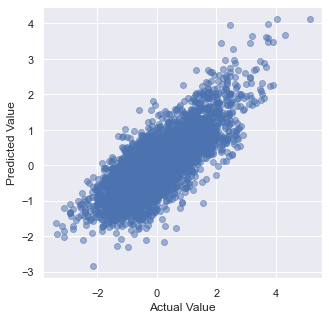

In [19]:
preds = final_model.predict(X_test_final)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Value")
ax.set_ylabel("Predicted Value")

This actually looks like it has a decently linear relationship, with no drastic outliers.

### Normality

C:\Users\shade\anaconda3\envs\learn-env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


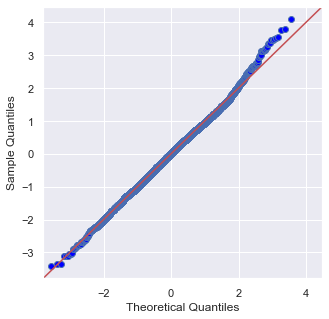

In [20]:
residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

Our model also does not violate the Normality assumption!

### Homoscedasticity

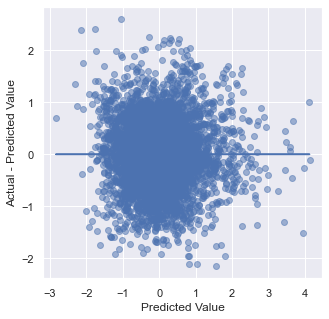

In [23]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

Unfortunately, our model shows no Homoscedasticity at all. However, this could be caused by many different factors, and can be expected considering our model has only been trained with a 60% accuracy rate.

## Conclusions

This is not the strongest Linear Regression Model ever made. But it could certainly be used as a baseline predictor for assessing the value of homes in King County.

In [17]:
print(pd.Series(final_model.coef_, index=X_train_final.columns, name="Coefficients"))
print()
print("Intercept:", final_model.intercept_)

sqft_living            0.628848
sqft_lot              -0.068664
yr_built              -0.254059
bedrooms_3            -0.300359
bedrooms_4            -0.385955
bedrooms_5            -0.429688
bedrooms_6            -0.533770
bathrooms_3_25         0.350723
bathrooms_3_5          0.356041
bathrooms_3_75         0.507304
bathrooms_4_25         0.658926
floors_3_0             0.412898
grade_11_Excellent     1.053104
grade_12_Luxury        1.353634
grade_13_Mansion       1.937678
grade_4_Low           -0.410151
grade_5_Fair          -0.636654
grade_6_Low_Average   -0.413357
grade_8_Good           0.212470
grade_9_Better         0.554903
condition_Very_Good    0.147501
view_EXCELLENT         0.502645
waterfront_YES         0.681546
Name: Coefficients, dtype: float64

Intercept: 0.12625961669982363


The above shows how our algorithm uses each feature to make determinations about the target price. The final steps we need to take are to determine whether our model holds to each of the assumptions of linear regression.

The most positively correlated features according to the model are sqft_living, waterfront, and view_excellent. This holds true to common assumptions of what would be of value in a house. However, there also is a negative correlation to things like grade_5_Fair, and bedrooms_6, which could be errors in the way our model was trained. 

### Next Steps
The reality is that there is a very broad range of factors that can influence any individual house sale. That being said, we could also explore more features based on commonplace observations. For example, our data contains information on when (in the case of our model, whether) each house was renovated, but not what elements of the house were renovated or what was changed about them. 

Additionally, we could run another analysis of the data using features like the grade, bathrooms, bedrooms, floors, etc. as continuous variables rather than categorical ones. This could lead to less cases like the one in which our model subtracts more value from a house for a 5("Fair") rating than a 4("Low") Rating. 

Furthermore, features like rating could use more exploration, and perhaps be removed from the dataset completely in future analyses.

We could also opt for a ground up approach, analyzing models trained on featuresets based on commonlplace assumptions about house values, instead of a purely data driven approach, which is prone to different kinds of errors.